In [48]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

***
<font size="10"><font color = red>__1.Data Preparation__</font>
***

In [49]:
#import the data file 'jester-joke-1' (we have already converted it into csv file)
joke = pd.read_csv('jester-data-1.csv')
#take  a quick look
joke.head()

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [50]:
#Check the vital statistics of the dataset using the type and shape attributes.
print("Data type : ", type(joke))
print("Data dims : ", joke.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (24982, 101)


In [51]:
#rename the second column which corresponds to the number of jokes that user has rated
joke.rename(columns={'74':'JokesRated'},inplace=True)

In [52]:
#check again the dataframe
joke.head()

,JokesRated,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


Now that the column has been assigned with a meaningful name.

In [53]:
#rename each column corresponding to each joke.
joke_index = ['JokesRated']
for i in range(0, 100):
    joke_index.append(str(i + 1))

joke.columns = joke_index
joke.head()

,JokesRated,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [54]:
#add a column at the back as the index of each user(UserId)
joke['UserId'] = range(1, len(joke) + 1)
joke.head()

,JokesRated,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,UserId
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07,1
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,2
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00,3
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60,4
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45,5


In [55]:
#shift the column to the front
user_id = joke['UserId']
joke.drop(labels=['UserId'], axis=1,inplace = True)
joke.insert(0, 'UserId', user_id)
joke
print(type(joke.iloc[1]['UserId']))

<class 'numpy.float64'>


In [56]:
#Check the variables (and their types) in the dataset using the dtypes attribute.
print(joke.dtypes)

UserId          int32
JokesRated      int64
1             float64
2             float64
3             float64
               ...   
96            float64
97            float64
98            float64
99            float64
100           float64
Length: 102, dtype: object


In [57]:
#clean all the 99(which means 'unrated' to NaN, i.e, Not a Number)
#and store the new dataframe as jokedf
joke['JokesRated'] = joke['JokesRated'].astype(str)
joke['UserId'] = joke['UserId'].astype(str)
jokedf = joke.replace(99.00,np.NaN)
jokedf['UserId'] = jokedf['UserId'].astype(float)
jokedf['JokesRated'] = jokedf['JokesRated'].astype(float)
jokedf

,UserId,JokesRated,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1.0,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,2.0,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,5.0,100.0,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,24978.0,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,24979.0,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,24980.0,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,24981.0,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#for the similarity matrix, 
# initialize all the 99 to the mean of that certain column
#to reach a more accurate similarity matrix.
ready_j = jokedf.copy().fillna(0)
for i in joke_index[1:]:
    mean = jokedf[str(i)].mean()
    ready_j[i] = ready_j[i].replace(0, mean)
ready_j

,UserId,JokesRated,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1.0,100.0,4.080000,-0.290000,6.360000,4.370000,-2.38,-9.660000,-0.73,-5.34,...,2.820000,-4.950000,-0.290000,7.860000,-0.19000,-2.140000,3.060000,0.340000,-4.320000,1.070000
1,2.0,49.0,0.905104,0.207988,0.317174,-1.448684,9.03,9.270000,9.03,9.27,...,2.038446,1.179744,2.504041,9.080000,1.03913,1.528003,1.674444,0.767692,-0.031244,1.354711
2,3.0,48.0,0.905104,8.350000,0.317174,-1.448684,1.80,8.160000,-2.82,6.21,...,2.038446,1.179744,2.504041,0.530000,1.03913,1.528003,1.674444,0.767692,-0.031244,1.354711
3,4.0,91.0,8.500000,4.610000,-4.170000,-5.390000,1.36,1.600000,7.04,4.61,...,5.190000,5.580000,4.270000,5.190000,5.73000,1.550000,3.110000,6.550000,1.800000,1.600000
4,5.0,100.0,-6.170000,-3.540000,0.440000,-8.500000,-7.09,-4.320000,-8.69,-0.87,...,-3.540000,-6.890000,-0.680000,-2.960000,-2.18000,-3.350000,0.050000,-9.080000,-5.050000,-3.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,24978.0,100.0,0.440000,7.430000,9.080000,2.330000,3.20,6.750000,-8.79,-0.53,...,8.830000,-1.210000,9.220000,-6.700000,8.45000,9.030000,6.550000,8.690000,8.790000,7.430000
24978,24979.0,91.0,9.130000,-8.160000,8.590000,9.080000,0.87,-8.930000,-3.50,5.78,...,-1.170000,-5.730000,-1.460000,0.240000,9.22000,-8.200000,-7.230000,-8.590000,9.130000,8.450000
24979,24980.0,39.0,0.905104,0.207988,0.317174,-1.448684,-7.77,1.594941,6.70,-6.75,...,2.038446,1.179744,2.504041,1.173482,1.03913,1.528003,1.674444,0.767692,-0.031244,1.354711
24980,24981.0,37.0,0.905104,0.207988,0.317174,-1.448684,-9.71,1.594941,4.56,-8.30,...,2.038446,1.179744,2.504041,1.173482,1.03913,1.528003,1.674444,0.767692,-0.031244,1.354711


***
<font size="5"><font color = red>__2.Simple Recommender System__</font>
***

In [59]:
def pearson(j1,j2):
    j1_c=j1-j1.mean()
    j2_c=j2-j2.mean()
    return np.sum(j1_c*j2_c) / np.sqrt(np.sum(j1_c ** 2) * np.sum(j2_c **2))

### Now to test the above function by checking correlation between Joke 1 and Joke 2 using Pearson's Correlation Coefficient

In [60]:
pearson(jokedf['1'],jokedf['2'])

0.36313955055218916

### To manually check a correlation of one joke with the rest of the 99 jokes would be tedious and hence the function below helps to speed that process up

In [61]:
def get_recs(j,jokedf,num): # j=Joke number to compare with the rest of the 99 jokes, jokedf= The entire joke dataset, num= total number of jokes in the dataset
    import numpy as np
    reviews=[]
    for title in jokedf.columns: 
        
         if (title == j or title == 'JokesRated'or title == 'UserId'):
            continue
         cor=pearson(jokedf[j],jokedf[title])
         if np.isnan(cor):
            continue
         else:
            reviews.append((title,cor))
    reviews.sort(key=lambda tup: tup[1], reverse=True) # sorting the new reviews list in descending order
    return reviews[:num]

In [62]:
recs1=get_recs('1',jokedf,100)
recs1[:10]

[('2', 0.36313955055218916),
 ('3', 0.3561574965105044),
 ('64', 0.34129625055811),
 ('37', 0.3248705044843079),
 ('9', 0.31879702625638623),
 ('44', 0.31042717468368947),
 ('10', 0.304436590850536),
 ('33', 0.30363578757297244),
 ('60', 0.2947471253289665),
 ('59', 0.2906788494144775)]

#### The above function call will help find the top 10 most correlated jokes to Joke 1 in descending order

In [63]:
anti_recs1=get_recs('1',jokedf,100)
anti_recs1[-10:]

[('71', 0.09158081209445086),
 ('89', 0.09074833836082068),
 ('78', 0.0873669122768657),
 ('80', 0.08648781430797767),
 ('75', 0.0836552784568769),
 ('20', 0.07952145395719866),
 ('79', 0.07522816313855482),
 ('73', 0.07509444296076034),
 ('77', 0.07003088131411103),
 ('17', 0.056243360594080874)]

#### The above function call will help find the top 10 jokes with lowest correlation with Joke 1 and print in descending order


### Now to put recs1 and anti_recs1 in dataframes for better visualization

In [64]:
recommend1=pd.DataFrame(recs1[:10],columns=['Joke Number','Correlation'])
recommend1

,Joke Number,Correlation
0,2,0.363140
1,3,0.356157
2,64,0.341296
3,37,0.324871
4,9,0.318797
5,44,0.310427
6,10,0.304437
7,33,0.303636
8,60,0.294747
9,59,0.290679


In [65]:
recommend1.describe()

,Correlation
count,10.000000
mean,0.320819
std,0.025253
min,0.290679
25%,0.303836
50%,0.314612
75%,0.337190
max,0.363140


In [66]:
notrecommend1=pd.DataFrame(anti_recs1[-10:],columns=['Joke Number','Correlation'])
notrecommend1

,Joke Number,Correlation
0,71,0.091581
1,89,0.090748
2,78,0.087367
3,80,0.086488
4,75,0.083655
5,20,0.079521
6,79,0.075228
7,73,0.075094
8,77,0.070031
9,17,0.056243


In [67]:
notrecommend1.describe()

,Correlation
count,10.000000
mean,0.079596
std,0.010896
min,0.056243
25%,0.075128
50%,0.081588
75%,0.087147
max,0.091581


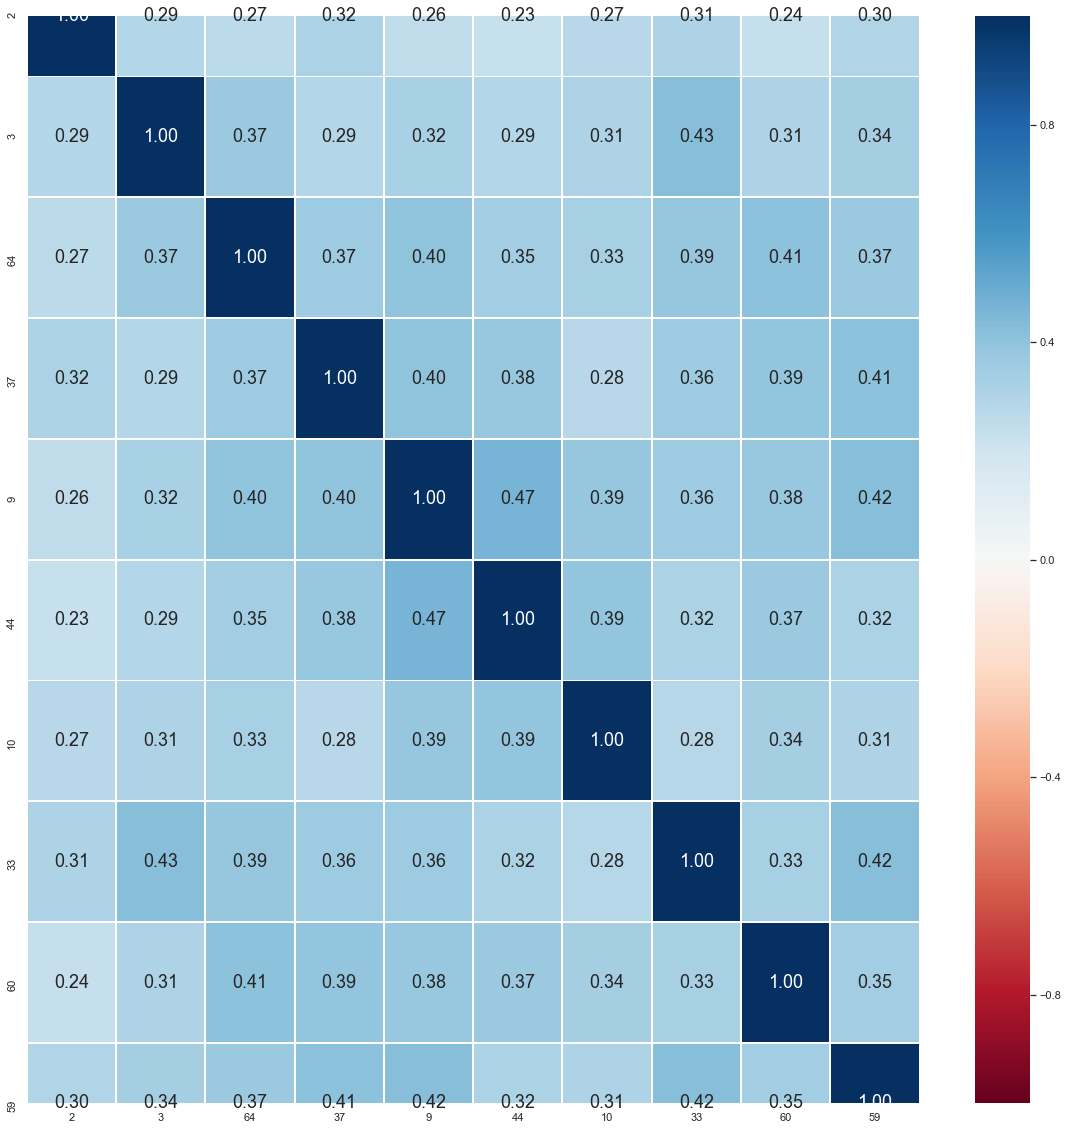

In [83]:
recd=pd.DataFrame(jokedf[['2','3','64','37','9','44','10','33','60','59']])

f,axes = plt.subplots(1, 1,figsize=(20,20))
sb.heatmap(recd.corr(),vmin=-1,vmax=1,linewidths=1,
          annot=True, fmt=".2f", annot_kws={"size":18},cmap="RdBu")

## The above correlation heatmap is used as a second layer of check to show that the recommended jokes are indeed something that the user will enjoy.
In this heatmap, every recommended joke is correlated with each other and compared. 
Because if joke X has high correlation with joke Y
and joke X has high correlation with joke Z then,
Y has high correlation with Z. 
This heatmap checks that to confirm.
# ===============================================================

## As well as this system works, it is still a very simple recommender system. 
### Having to recommend jokes to the user based on a SINGLE joke that the user likes might not be that accurate. So if the user provides another joke he/she likes, then the recommendation can be more accurate.

In [92]:
# Lets say the user says that he/she likes joke 5 as well
recs5=get_recs('5',jokedf,100)
top30_5=recs5[:30]
top30_5

[('51', 0.27241698799486713),
 ('52', 0.2715853698412389),
 ('31', 0.26982461835350613),
 ('27', 0.2679138125128614),
 ('21', 0.26543221334344036),
 ('40', 0.2472736971945824),
 ('19', 0.24543379243115132),
 ('11', 0.2420120237997745),
 ('61', 0.2364670499601763),
 ('20', 0.23609705057309496),
 ('36', 0.23261154482528332),
 ('39', 0.23144780001018436),
 ('35', 0.23018516524176272),
 ('66', 0.22783140024916781),
 ('17', 0.22765908050644362),
 ('7', 0.20012726851968693),
 ('26', 0.19929340555965488),
 ('48', 0.19779158936713198),
 ('65', 0.19767554081731037),
 ('12', 0.19711326447377794),
 ('29', 0.19497643929817043),
 ('69', 0.19461777536827904),
 ('28', 0.19432691626966592),
 ('53', 0.19336771009413736),
 ('34', 0.18780611512735707),
 ('32', 0.18649781455920933),
 ('30', 0.18562902605242093),
 ('50', 0.18496369315214573),
 ('49', 0.18390900115262196),
 ('25', 0.18327631452081092)]

In [93]:
top30_1=recs1[:30]
top30_1

[('2', 0.36313955055218916),
 ('3', 0.3561574965105044),
 ('64', 0.34129625055811),
 ('37', 0.3248705044843079),
 ('9', 0.31879702625638623),
 ('44', 0.31042717468368947),
 ('10', 0.304436590850536),
 ('33', 0.30363578757297244),
 ('60', 0.2947471253289665),
 ('59', 0.2906788494144775),
 ('4', 0.28393966815737376),
 ('24', 0.2813008690023712),
 ('43', 0.27733577211885163),
 ('25', 0.2749111356808819),
 ('41', 0.2743986867372293),
 ('57', 0.2734449279677215),
 ('55', 0.26635503647538605),
 ('23', 0.2658256060061753),
 ('38', 0.26547880403492446),
 ('30', 0.2648372962803611),
 ('45', 0.25339746176686156),
 ('67', 0.2506830317023937),
 ('22', 0.246563365803751),
 ('40', 0.24647199468897849),
 ('11', 0.23624183163747256),
 ('51', 0.2347143430701574),
 ('63', 0.23419991257265604),
 ('70', 0.22922541710697403),
 ('58', 0.22016768284314903),
 ('52', 0.22013934340261004)]

In [94]:
better_recd=[]
for i in range (1,30):
    for j in range(1,30):
        if (top30_1[i][0]==top30_5[j][0]):
         better_recd.append(top30_5[j][0])
print (better_recd)

betterRecommender=pd.DataFrame(better_recd,columns=['Joke'])
betterRecommender

['25', '30', '40', '11', '52']


,Joke
0,25
1,30
2,40
3,11
4,52


## So how this is implemented is:
### 1) We find the top 30 correlated jokes with respect to joke 5 (top30_5)
### 2) We find the top 30 correlated jokes with respect to joke 1 (top30_1)
### 3) Using the code written above this, we find the jokes common to both lists(top30_1 AND top30_5) and then              store it in a Dataframe 'betterRecommender'
## Then the common jokes between the two recommendations stored in                                          'betterRecommender' would be a list more accurate to user's preference
# ===============================================================

# Now for a more complex recommender system


***
<font size="5"><font color = red>__3.User-to-User Recommender System__</font>
***


In [17]:
#import the data file 'jester-joke-2' (we have already converted it into csv file)
joke2 = pd.read_csv('jester-data-2.csv')
#take  a quick look
joke2.head()

,50,99,8.11,99.1,99.2,-2.28,-4.22,5.49,-2.62,99.3,...,99.41,99.42,99.43,99.44,99.45,-5.92,99.46,99.47,99.48,99.49
0,100,-4.37,-3.88,0.73,-3.2,-6.41,1.17,7.82,-4.76,-6.41,...,5.73,-6.7,1.99,2.62,-0.49,3.45,3.2,-0.53,-0.53,-2.96
1,42,99.00,99.00,99.00,99.0,0.73,99.00,5.53,3.25,99.00,...,99.00,99.0,99.00,99.00,3.16,99.00,99.0,99.00,99.00,99.00
2,65,0.34,-6.55,2.86,99.0,-3.64,1.12,5.34,2.33,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00
3,37,99.00,99.00,99.00,99.0,9.13,99.00,-9.32,-2.04,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00
4,37,99.00,99.00,99.00,99.0,-1.46,99.00,2.72,-3.83,99.00,...,99.00,99.0,99.00,1.89,99.00,99.00,99.0,99.00,99.00,99.00


In [18]:
#rename each column corresponding to each joke.
joke2_index = ['JokesRated']
for i in range(0, 100):
    joke2_index.append(str(i + 1))

joke2.columns = joke2_index


#add a column at the back as the index of each user(UserId)
joke2['UserId'] = range(1, len(joke2) + 1)


#shift the column to the front
user_id_2 = joke2['UserId']
joke2.drop(labels=['UserId'], axis=1,inplace = True)
joke2.insert(0, 'UserId', user_id)
joke2

,UserId,JokesRated,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1,100,-4.37,-3.88,0.73,-3.20,-6.41,1.17,7.82,-4.76,...,5.73,-6.70,1.99,2.62,-0.49,3.45,3.20,-0.53,-0.53,-2.96
1,2,42,99.00,99.00,99.00,99.00,0.73,99.00,5.53,3.25,...,99.00,99.00,99.00,99.00,3.16,99.00,99.00,99.00,99.00,99.00
2,3,65,0.34,-6.55,2.86,99.00,-3.64,1.12,5.34,2.33,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
3,4,37,99.00,99.00,99.00,99.00,9.13,99.00,-9.32,-2.04,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
4,5,37,99.00,99.00,99.00,99.00,-1.46,99.00,2.72,-3.83,...,99.00,99.00,99.00,1.89,99.00,99.00,99.00,99.00,99.00,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,23495,70,-9.95,4.85,-9.95,-8.25,1.41,-1.75,3.11,3.79,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
23495,23496,100,-0.78,1.31,-2.09,-0.78,4.71,0.19,3.06,-1.31,...,0.29,-0.92,0.53,2.14,2.48,1.02,2.57,1.02,-0.29,0.78
23496,23497,51,99.00,99.00,99.00,99.00,6.12,99.00,5.78,-5.53,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
23497,23498,100,1.02,2.77,7.09,0.05,1.26,1.41,2.62,0.49,...,7.82,1.07,4.27,3.35,0.63,2.38,2.62,2.57,1.94,3.98


In [19]:
#clean all the 99(which means 'unrated' to NaN, i.e, Not a Number)
#and store the new dataframe as jokedf
joke2['JokesRated'] = joke2['JokesRated'].astype(str)
joke2['UserId'] = joke2['UserId'].astype(str)
joke2df = joke2.replace(99.00,np.NaN)
joke2df['UserId'] = joke2df['UserId'].astype(int)
joke2df['JokesRated'] = joke2df['JokesRated'].astype(int)
joke2df


,UserId,JokesRated,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1,100,-4.37,-3.88,0.73,-3.20,-6.41,1.17,7.82,-4.76,...,5.73,-6.70,1.99,2.62,-0.49,3.45,3.20,-0.53,-0.53,-2.96
1,2,42,NaN,NaN,NaN,NaN,0.73,NaN,5.53,3.25,...,NaN,NaN,NaN,NaN,3.16,NaN,NaN,NaN,NaN,NaN
2,3,65,0.34,-6.55,2.86,NaN,-3.64,1.12,5.34,2.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,37,NaN,NaN,NaN,NaN,9.13,NaN,-9.32,-2.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,37,NaN,NaN,NaN,NaN,-1.46,NaN,2.72,-3.83,...,NaN,NaN,NaN,1.89,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,23495,70,-9.95,4.85,-9.95,-8.25,1.41,-1.75,3.11,3.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23495,23496,100,-0.78,1.31,-2.09,-0.78,4.71,0.19,3.06,-1.31,...,0.29,-0.92,0.53,2.14,2.48,1.02,2.57,1.02,-0.29,0.78
23496,23497,51,NaN,NaN,NaN,NaN,6.12,NaN,5.78,-5.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23497,23498,100,1.02,2.77,7.09,0.05,1.26,1.41,2.62,0.49,...,7.82,1.07,4.27,3.35,0.63,2.38,2.62,2.57,1.94,3.98


In [20]:
#Function get_user_record(usertopredict_id):
#get the user record to predict and store it into a new data frame;

def get_user_record(usertopredict_id):
    record_to_pred = usertopredict_id - 1
    joke2_test = pd.DataFrame(joke2df.iloc[record_to_pred])
    return joke2_test


get_user_record(50)

,49
UserId,50.00
JokesRated,43.00
1,NaN
2,NaN
3,NaN
...,...
96,NaN
97,2.23
98,NaN
99,NaN


In [21]:
#Function keep_10_liked(userid):
#To prepare the dataset of the user such that only the top ten joke ratings are kept in the record;
#for testing

def keep_10_liked(userid):
    
    #Extract all the rating columns
    joke2_test = get_user_record(userid)
    joke2_test_ratings = pd.DataFrame(joke2_test.iloc[2:])
    
    #Only keep the top ten most liked jokes by that user, again store it into a data frame
    joke2_test_ratings = joke2_test_ratings.nlargest(10,userid-1)
    keep_list = joke2_test_ratings.index
    for i in range(2, 102):
        if str(i-1) not in keep_list:
            joke2_test.iloc[i] = np.nan
    
    #Transpose the dataframe, now it's a row record
    joke2_test = joke2_test.transpose()
    return joke2_test

#keep_10_liked(50)

In [22]:
#Function: concat_to_jester1(userid):
#append the user record (to predict) to the jester-joke-1 data frame
#and initialise all the NaN to the mean of that particulat column

def concat_to_jester1(userid):
    joke2_test = keep_10_liked(userid)
    #Concatenate the dataframes
    frames = [ready_j, joke2_test]
    result_j = pd.concat(frames)
    
    #reindex the dataframe
    result_j.reset_index(drop=True, inplace=True)

    #change the userid for later manipulation
    result_j.iloc[24982]['UserId'] = 24983
    
    #for the similarity matrix, 
    # initialize all the NaN to the mean of that certain column
    #to reach a more accurate similarity matrix.
    final_j = result_j.copy()
    for i in joke_index[1:]:
        mean = jokedf[str(i)].mean()
        final_j[i] = final_j[i].replace(np.NaN, mean)
    return final_j


#concat_to_jester1(50)

#matrix.iloc[24893][joke_index[1:]]

In [23]:
#Transfer the data frame to pivot table for calculating the cosine similarity matrix.
def to_pivot_table(userid):
    final_j = concat_to_jester1(userid)
    final_matrix = final_j.pivot_table(index="UserId",values=joke_index[1:])
    return final_matrix

#to_pivot_table(50)

In [24]:
#Function cos_sim_abs(userid):
#calculate the cosine similarity between users and transfer it to abosolute values

def cos_sim_abs(userid):
    
    final_matrix = to_pivot_table(userid)
    
    #Create a dummy ratings matrix with all null values imputed to 0
    final_matrix_dummy = final_matrix.copy()

    # Import cosine_score 
    from sklearn.metrics.pairwise import cosine_similarity

    #Compute the cosine similarity matrix using the dummy ratings matrix
    cosine_sim_final = cosine_similarity(final_matrix_dummy, final_matrix_dummy)
    
    #Convert into pandas dataframe 
    cosine_sim_final = pd.DataFrame(cosine_sim_final, index=final_matrix.index, columns=final_matrix.index)
    
    #Get the absolute values of cosine similarities so that we can filter the top 100 similar users
    sim_to_compare_final = cosine_sim_final.abs()
    return sim_to_compare_final

#abs_m = cos_sim_abs(50)
#abs_m

In [25]:
#Function top100_sim(userid):
#get the indices from top 100 similar users from the similarity matrix.

def top100_sim(userid):

    sim_to_compare_final = cos_sim_abs(userid)
    
    #Get the similarity scores for the user in question with every other user
    col_for_user = 24983
    
    sim_scores_final = pd.DataFrame(sim_to_compare_final[col_for_user])
    #get top 100 users that are similar to the user in the question
    top100sim = pd.DataFrame(sim_scores_final.nlargest(100,col_for_user).index)
    
    return top100sim
    #Note that this UserId(starts from 0) is different from that in the original df ready_j,
    #UserId(here) = UserId(in original ready_j) - 1

    
top100_sim(50)

,UserId
0,24983.0
1,755.0
2,20609.0
3,2489.0
4,15041.0
...,...
95,22130.0
96,18472.0
97,18741.0
98,3207.0


In [26]:
#Function top100_record(userid):
#Store the records of top 100 similar users in a new dataframe

def top100_record(userid):
    top100sim = top100_sim(userid)
    cols = ['UserId']+joke_index

    top100_rec = pd.DataFrame(columns=cols)

    final_j = concat_to_jester1(userid)
    for i in top100sim['UserId']:
        top100_rec = top100_rec.append(final_j.iloc[int(i)-1])
    
    return top100_rec
#top100_record(50)

In [27]:
#Function recommend(userid):
#get the mostly liked 20 jokes by the selected similar users

def recommend(userid):
    top100_rec = top100_record(userid)
    
    #get the mean rating of each joke and store the means into a list
    mean_of_jokes = []
    for i in joke_index[1:]:
        mean_of_jokes.append(top100_rec[i].mean())

    #find the 20 most liked jokes by these 10 users(on average)
    mean_df = pd.DataFrame(mean_of_jokes)
    recommend = mean_df.nlargest(20,0)
    
    return recommend.index

recommend(50)

Int64Index([26, 64, 53, 67, 48, 60, 35, 52, 31, 47, 61, 28, 34, 49, 65, 68, 30,
            20, 41, 55],
           dtype='int64')

***
<font size="10"><font color = red>__3.Prediction Accuracy__</font>
***

In [28]:
#Function truely_liked(userid):
#from the original user record, find 20 jokes most liked by the user.
#store the index in a list.(to test the recommendation)

def truely_liked(userid):
    
    user_rec = get_user_record(userid)
    user_to_pred = pd.DataFrame(user_rec.iloc[2:])
    
    #pick the 20 jokes most liked by the user in question
    user_largest = user_to_pred.nlargest(20,userid - 1)
    return user_largest.index

truely_liked(50)

Index(['49', '36', '61', '48', '53', '60', '27', '65', '68', '54', '69', '29',
       '8', '11', '46', '50', '21', '35', '28', '38'],
      dtype='object')

In [29]:
#Function pred_accuracy(userid):
#calculate the accuracy of prediction
#(Among the recommended jokes, how many are really liked(in top 20) by the user?)

def pred_accuracy(userid):
    
    #Among the recommended jokes, which are really liked(in top 20) by the user?
    recommend_j = recommend(userid)
    largest_indexlist = truely_liked(userid)
    liked_j = []
    for i in recommend_j:
        for j in largest_indexlist:
            if i == int(j):
                liked_j.append(j)
    
    #Extract all the rating columns
    joke2_test = get_user_record(userid)
    joke2_test_ratings = pd.DataFrame(joke2_test.iloc[2:])
    #Only keep the top ten most liked jokes by that user, again store it into a data frame
    joke2_test_ratings = joke2_test_ratings.nlargest(10,userid-1)
    keep_list = joke2_test_ratings.index
    
    #discard the jokes we used as test data,
    #the ones left are the true positive(TP) prediction.
    TP = 0
    for m in liked_j:
        if m not in keep_list:
            TP += 1
    
    #calculate Precision = TP/Total
    Total = 20
    p = TP/Total
    
    #Print out the result
    print('For user: UserId = ', userid)
    print('Recommend Joke indices are: ',recommend_j)
    print('Correct Prediction: \t', liked_j)
    print('Among the correct predictions, ', TP, 'are new jokes.')
    print('Prediction Accuracy: ', p)



In [32]:
pred_accuracy(2)

For user: UserId =  2
Recommend Joke indices are:  Int64Index([34, 31, 35, 28, 53, 49, 48, 67, 61, 26, 52, 65, 64, 60, 68, 30, 47,
            25, 20, 41],
           dtype='int64')
Correct Prediction: 	 ['31', '35', '28', '53', '49', '48', '26', '65', '20']
Among the correct predictions,  6 are new jokes.
Prediction Accuracy:  0.3
